Loading and Exploring AFL Match Data for Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mplfooty.pitch import Pitch

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from expected_score_model.config import set_shots_file_path
# from total_points_model.domain.preprocessing.data_preprocessor import DataPreprocessor
# from total_points_model.domain.contracts.mappings import Mappings
# from total_points_model.domain.contracts.rolling_columns import RollingColumns
# from total_points_model.domain.contracts.modelling_data_contract import ModellingDataContract


In [2]:
df_set_shots = pd.read_csv(set_shots_file_path)
df_set_shots.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
11052,208,possGain,behind,1663.0,4,634,683.0,Geelong,Geelong,Tom Hawkins,Tom_Hawkins,Kick,41.0,25.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,1,0,106.0,33.0,73.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,41.0,48.0,48.0,26.0,25.0,21.0,21.0,14.0,683.0,644.0,642.0,641.0,49.0,39.0,8.062258,39.0,25.0,46.324939,0.570040,32.660913,0.116867,6.695990,0.364585,20.889203,1521.0,3.663562,True
11053,212,kickIn,goal,1730.0,4,787,885.0,Geelong,Geelong,Patrick Dangerfield,Patrick_Dangerfield,Kick,51.0,43.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,1,0,108.0,34.0,74.0,Kick,Contested Mark,Contest Target,Kick Inside 50 Result,51.0,53.0,53.0,53.0,43.0,38.0,38.0,38.0,885.0,852.0,851.0,850.0,98.0,33.0,5.385165,29.0,43.0,51.865210,0.977446,56.003541,0.069260,3.968302,0.214332,12.280314,841.0,3.367296,True
11054,213,centreBounce,goal,1754.0,4,956,979.0,Sydney,Sydney,Paddy McCartin,Paddy_McCartin,Kick,66.0,0.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,0,6,115.0,34.0,81.0,Kick,Free For,Kick Inside 50 Result,Kick Into F50,66.0,74.0,74.0,27.0,0.0,0.0,0.0,17.0,979.0,977.0,968.0,967.0,23.0,2.0,8.000000,14.0,0.0,14.000000,0.000000,0.000000,0.482343,27.636207,2.588598,148.315731,196.0,2.639057,True
11055,219,centreBounce,goal,1846.0,4,1252,1266.0,Sydney,Sydney,Chad Warner,Chad_Warner,Kick,26.0,3.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,0,6,121.0,40.0,81.0,Kick,Uncontested Mark,Ground Kick,Handball,26.0,18.0,-5.0,-2.0,3.0,2.0,-4.0,3.0,1266.0,1265.0,1264.0,1260.0,14.0,1.0,8.062258,54.0,3.0,54.083269,0.055499,3.179830,0.118569,6.793500,0.365993,20.969862,2916.0,3.988984,True
11056,228,centreBounce,goal,1912.0,4,1519,1560.0,Geelong,Geelong,Jeremy Cameron,Jeremy_Cameron,Kick,41.0,21.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,127.0,46.0,81.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,41.0,49.0,49.0,25.0,21.0,17.0,17.0,33.0,1560.0,1535.0,1532.0,1531.0,41.0,25.0,8.944272,39.0,21.0,44.294469,0.493941,28.300756,0.127885,7.327246,0.400462,22.944787,1521.0,3.663562,True


Response Distribution

In [3]:
df_set_shots['Final_State'].value_counts(normalize=True)

goal      0.541377
behind    0.333544
miss      0.125079
Name: Final_State, dtype: float64

Shots on Pitch (Need to standardise all venues to same dimensions when plotting multiple games.)

In [4]:
match_shots = df_set_shots[df_set_shots['Match_ID'] == "2022F4_Geelong_Sydney"]
match_shots

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
11029,2,possGain,behind,16.0,1,24,63.0,Geelong,Geelong,Tom Hawkins,Tom_Hawkins,Kick,62.0,38.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,1,0,0.0,0.0,0.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,62.0,65.0,65.0,30.0,38.0,34.0,34.0,57.0,63.0,29.0,27.0,26.0,39.0,34.0,5.000000,18.0,38.0,42.047592,1.128422,64.653824,0.065538,3.755048,0.206225,11.815819,324.0,2.890372,True
11030,42,centreBounce,goal,315.0,1,1036,1086.0,Geelong,Geelong,Mark Blicavs,Mark_Blicavs,Kick,65.0,14.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,13.0,6.0,7.0,Kick,Uncontested Mark,Kick,Handball Received,65.0,68.0,30.0,32.0,14.0,11.0,-28.0,-35.0,1086.0,1062.0,1060.0,1056.0,50.0,24.0,4.242641,15.0,14.0,20.518285,0.750929,43.025066,0.233713,13.390775,0.875806,50.179980,225.0,2.708050,True
11031,53,possGain,miss,408.0,1,1426,1458.0,Geelong,Geelong,Gryan Miers,Gryan_Miers,Kick,61.0,38.0,clanger,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,0,0,0,0,31.0,6.0,25.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,61.0,63.0,63.0,49.0,38.0,32.0,33.0,51.0,1458.0,1430.0,1429.0,1429.0,32.0,28.0,6.324555,19.0,38.0,42.485292,1.107149,63.434949,0.067753,3.881949,0.212980,12.202833,361.0,2.944439,True
11032,58,possGain,goal,459.0,1,1572,1607.0,Geelong,Geelong,Brad Close,Brad_Close,Kick,55.0,33.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,32.0,6.0,26.0,Kick,Uncontested Mark,Kick Inside 50 Result,Kick Into F50,55.0,57.0,57.0,32.0,33.0,29.0,29.0,41.0,1607.0,1574.0,1573.0,1572.0,35.0,33.0,4.472136,25.0,33.0,41.400483,0.922464,52.853313,0.093910,5.380643,0.295960,16.957267,625.0,3.218876,True
11033,59,centreBounce,behind,471.0,1,1662,1701.0,Geelong,Geelong,Jeremy Cameron,Jeremy_Cameron,Kick,34.0,9.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,1,0,38.0,6.0,32.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,34.0,42.0,42.0,9.0,9.0,7.0,7.0,31.0,1701.0,1677.0,1676.0,1675.0,39.0,24.0,8.246211,46.0,9.0,46.872167,0.193211,11.070203,0.134628,7.713639,0.419604,24.041558,2116.0,3.828641,True
11034,61,possGain,behind,482.0,1,1727,1776.0,Geelong,Geelong,Zach Guthrie,Zach_Guthrie,Kick,29.0,-17.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,1,0,39.0,6.0,33.0,Kick,Uncontested Mark,Kick,Contested Mark,29.0,-10.0,6.0,12.0,-17.0,-26.0,-48.0,-47.0,1776.0,1735.0,1733.0,1727.0,49.0,41.0,40.024992,51.0,17.0,53.758720,0.321751,18.434949,0.113343,6.494063,0.349984,20.052622,2601.0,3.931826,True
11035,81,possGain,goal,629.0,2,232,264.0,Geelong,Geelong,Tyson Stengle,Tyson_Stengle,Kick,40.0,-27.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,40.0,7.0,33.0,Kick,Uncontested Mark,Kick Inside 50 Result,Kick Into F50,40.0,45.0,45.0,44.0,-27.0,-25.0,-25.0,-44.0,264.0,234.0,233.0,232.0,32.0,30.0,5.385165,40.0,27.0,48.259714,0.593750,34.019350,0.110404,6.325674,0.343341,19.672019,1600.0,3.688879,True
11036,82,centreBounce,behind,637.0,2,320,363

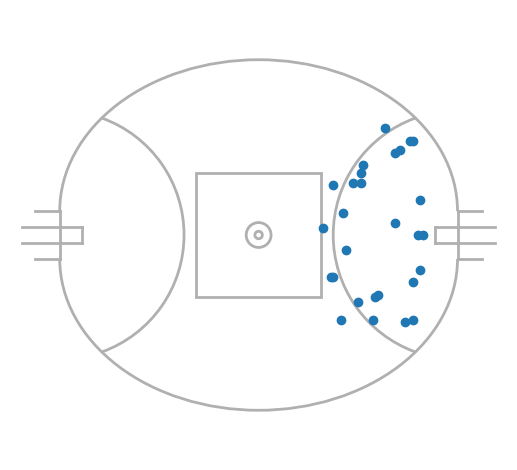

In [5]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160)
fig, ax = pitch.draw()
pitch.scatter(match_shots['x'], match_shots['y'], ax=ax)

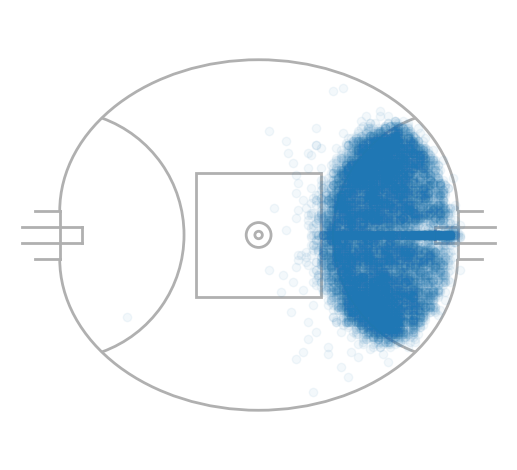

In [6]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160)
fig, ax = pitch.draw()
pitch.scatter(df_set_shots['x'], df_set_shots['y'], ax=ax, alpha=0.05)

Goals

In [7]:
df_goals = df_set_shots[df_set_shots['Goal']==1]
df_goals.shape

(5890, 64)

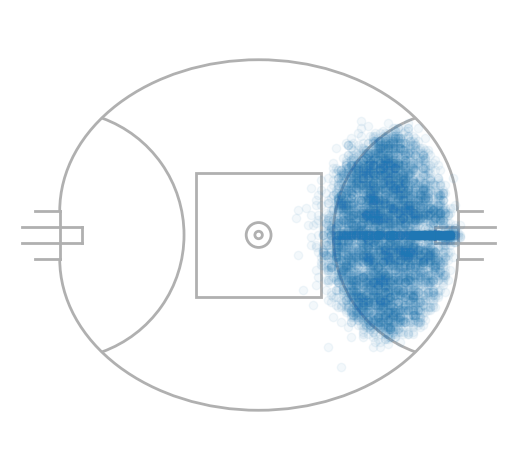

In [8]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160)
fig, ax = pitch.draw()
pitch.scatter(df_goals['x'], df_goals['y'], ax=ax, alpha=0.05)

In [9]:
df_set_shots[df_set_shots['y'] == 0].tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
10990,159,possGain,goal,1208.0,3,1173,1219.0,Geelong,Geelong,Gryan Miers,Gryan_Miers,Kick,33.0,0.0,effective,True,NaN,141,160,Geelong,Brisbane Lions,right,2022F3_Geelong_BrisbaneLions,2022F3,2022,1,0,6,6,0,70.0,26.0,44.0,Kick,Uncontested Mark,Kick Inside 50 Result,Kick Into F50,33.0,42.0,42.0,17.0,0.0,0.0,0.0,4.0,1219.0,1186.0,1185.0,1185.0,46.0,33.0,9.000000,47.0,0.0,47.0,0.0,0.0,0.136804,7.838314,0.426296,24.424950,2209.00,3.850148,True
10991,160,centreBounce,goal,1212.0,3,1272,1326.0,Geelong,Geelong,Joel Selwood,Joel_Selwood,Kick,45.0,0.0,effective,True,NaN,141,160,Geelong,Brisbane Lions,right,2022F3_Geelong_BrisbaneLions,2022F3,2022,1,0,6,6,0,76.0,26.0,50.0,Kick,Free For,Centre Bounce,Goal,45.0,1.0,0.0,33.0,0.0,3.0,0.0,0.0,1326.0,1283.0,1272.0,1220.0,54.0,43.0,44.102154,35.0,0.0,35.0,0.0,0.0,0.184399,10.565259,0.593199,33.987822,1225.00,3.555348,True
11020,129,possGain,goal,969.0,3,187,233.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,56.0,0.0,effective,True,NaN,136,155,Sydney,Collingwood,right,2022F3_Sydney_Collingwood,2022F3,2022,1,0,6,6,0,73.0,45.0,28.0,Kick,Contested Mark,Kick Inside 50 Result,Kick Into F50,56.0,60.0,60.0,28.0,0.0,0.0,0.0,37.0,233.0,201.0,198.0,197.0,46.0,32.0,4.000000,21.5,0.0,21.5,0.0,0.0,0.304418,17.441869,1.115404,63.907962,462.25,3.068053,True
11037,88,possGain,goal,686.0,2,480,540.0,Sydney,Sydney,Hayden McLean,Hayden_McLean,Kick,64.0,0.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,0,6,47.0,7.0,40.0,Kick,Contested Mark,Kick Inside 50 Result,Kick Into F50,64.0,71.0,71.0,20.0,0.0,1.0,1.0,0.0,540.0,512.0,508.0,508.0,60.0,28.0,7.071068,16.0,0.0,16.0,0.0,0.0,0.416667,23.873241,1.875000,107.429587,256.00,2.772589,True
11054,213,centreBounce,goal,1754.0,4,956,979.0,Sydney,Sydney,Paddy McCartin,Paddy_McCartin,Kick,66.0,0.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,0,6,115.0,34.0,81.0,Kick,Free For,Kick Inside 50 Result,Kick Into F50,66.0,74.0,74.0,27.0,0.0,0.0,0.0,17.0,979.0,977.0,968.0,967.0,23.0,2.0,8.000000,14.0,0.0,14.0,0.0,0.0,0.482343,27.636207,2.588598,148.315731,196.00,2.639057,True


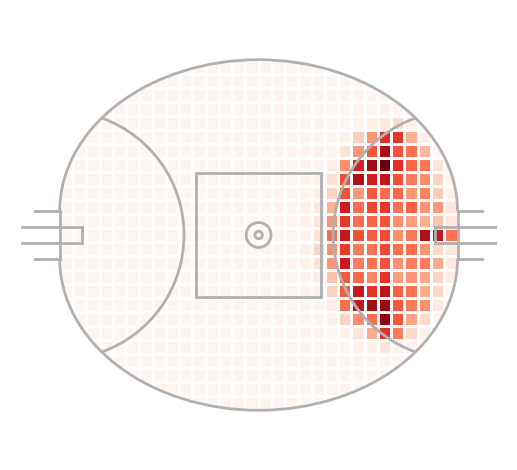

In [36]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160, line_zorder=2)
fig, ax = pitch.draw()
stats = pitch.bin_statistic(df_set_shots['x'], df_set_shots['y'], bins=(30, 25))
pitch.heatmap(stats, edgecolors="white", cmap="Reds", ax=ax)

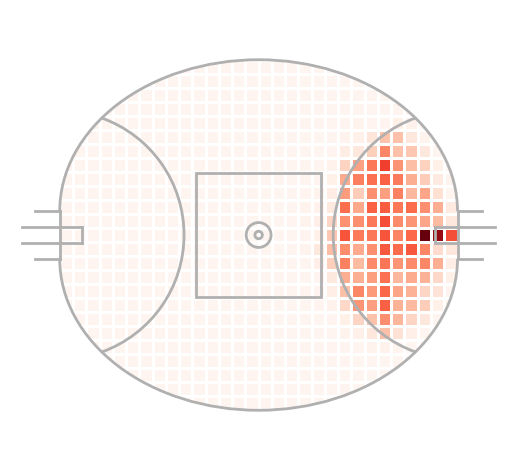

In [35]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160, line_zorder=2)
fig, ax = pitch.draw()
stats = pitch.bin_statistic(df_goals['x'], df_goals['y'], bins=(30, 25))
pitch.heatmap(stats, edgecolors="white", cmap="Reds", ax=ax)

<Axes: >

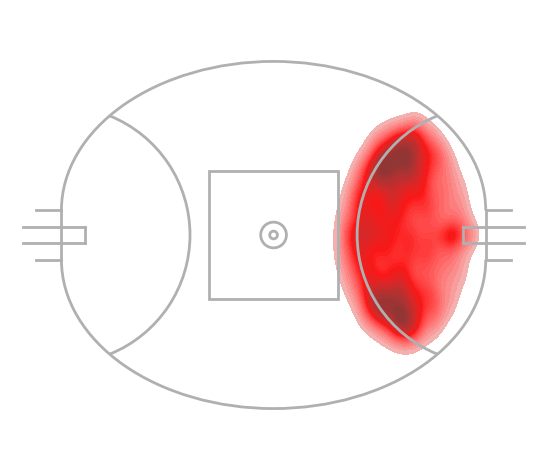

In [40]:
# Plot pitch
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2)
fig, ax = pitch.draw()
pitch.kdeplot(df_set_shots['x'], df_set_shots['y'], ax=ax, fill = True, color = "red", levels=30)

<Axes: >

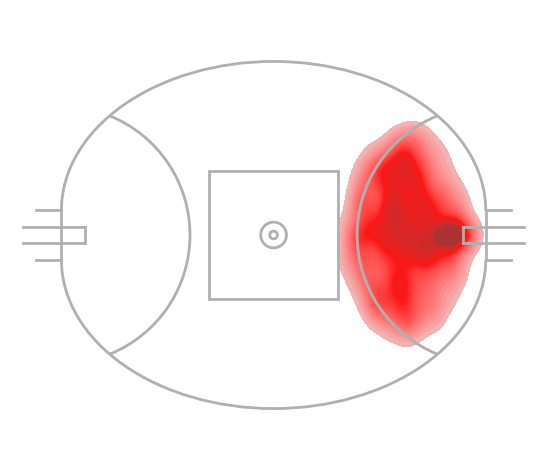

In [41]:
# Plot pitch
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2)
fig, ax = pitch.draw()
pitch.kdeplot(df_goals['x'], df_goals['y'], ax=ax, fill = True, color = "red", levels=30)

Exploration Functions

In [10]:
def _get_feature_plot_data(data, response, feature):
    
    from pandas.api.types import is_numeric_dtype
    
    plot_dict = {
    'actual':data[response],
    'feature':data[feature]
    }
    plot_data = pd.DataFrame(plot_dict)

    if is_numeric_dtype(plot_data['feature']) & (len(np.unique(plot_data['feature'])) > 50):
        bins = 10
        edges = np.linspace(plot_data['feature'].min(), plot_data['feature'].max(), bins+1).astype(float).round(3)
        labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
        plot_data['feature'] = pd.qcut(plot_data['feature'], q= bins, labels = labels)
        
    feature_plot_data = plot_data.groupby('feature').agg(
        actual = ('actual', 'mean'),
        exposure = ('actual', 'size'),
        ).reset_index()
    
    feature_plot_data['relative'] = feature_plot_data['actual'] / data[response].mean()
    
    return feature_plot_data.sort_values(by = 'feature')

In [11]:
def plot_feature(data, response, feature):
    
    import matplotlib.pyplot as plt
    
    feature_plot_data = _get_feature_plot_data(data, response, feature)

    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.bar(feature_plot_data['feature'],feature_plot_data['exposure'], alpha = 0.5)
    ax2.plot(feature_plot_data['feature'], feature_plot_data['actual'], label = "Actual", color = "r")
    ax2.axhline(y = data[response].mean(), color = 'green', linestyle = '-')

    ax1.set_xlabel(feature)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
        
    ax1.set_ylabel("Exposure", fontsize=14)
    ax2.set_ylabel(response, fontsize=14)

    ax2.legend()

    fig.suptitle("Actual: " + feature, fontsize=20)
    fig.show()

One Way Averages

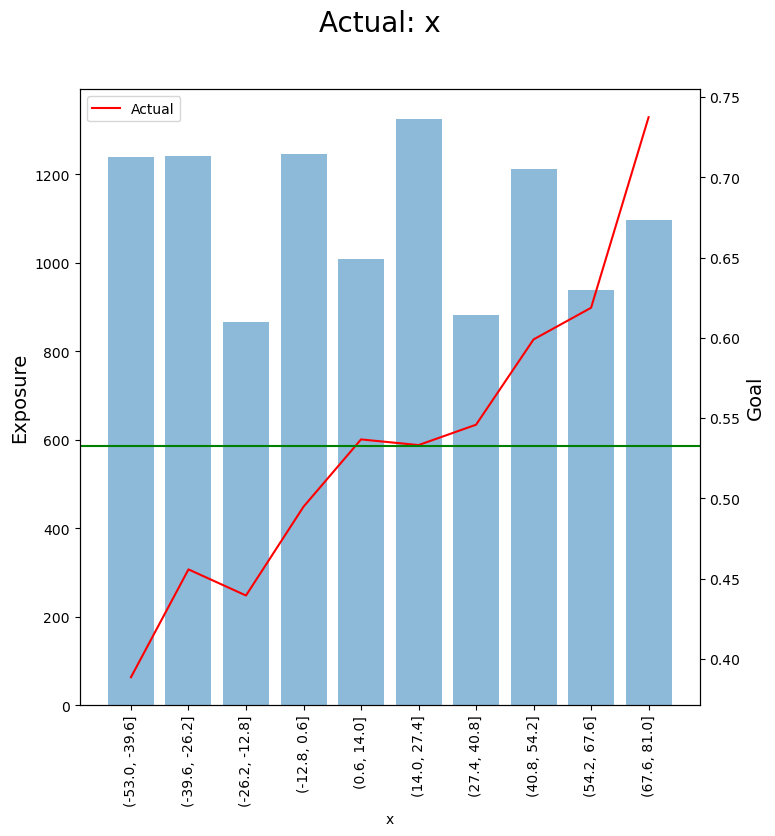

In [12]:
plot_feature(df_set_shots, "Goal", "x")

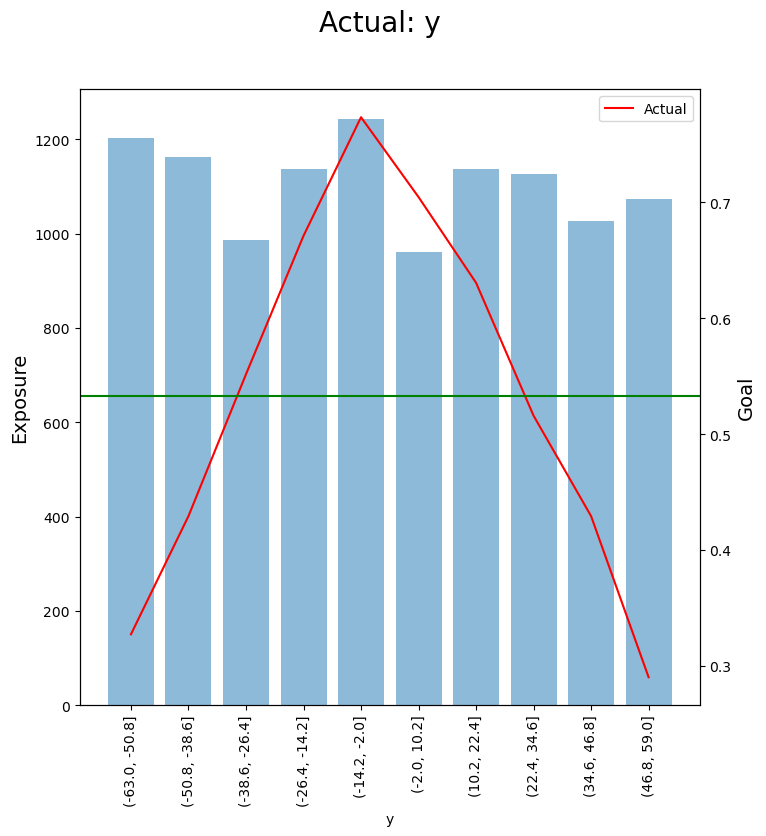

In [13]:
plot_feature(df_set_shots, "Goal", "y")

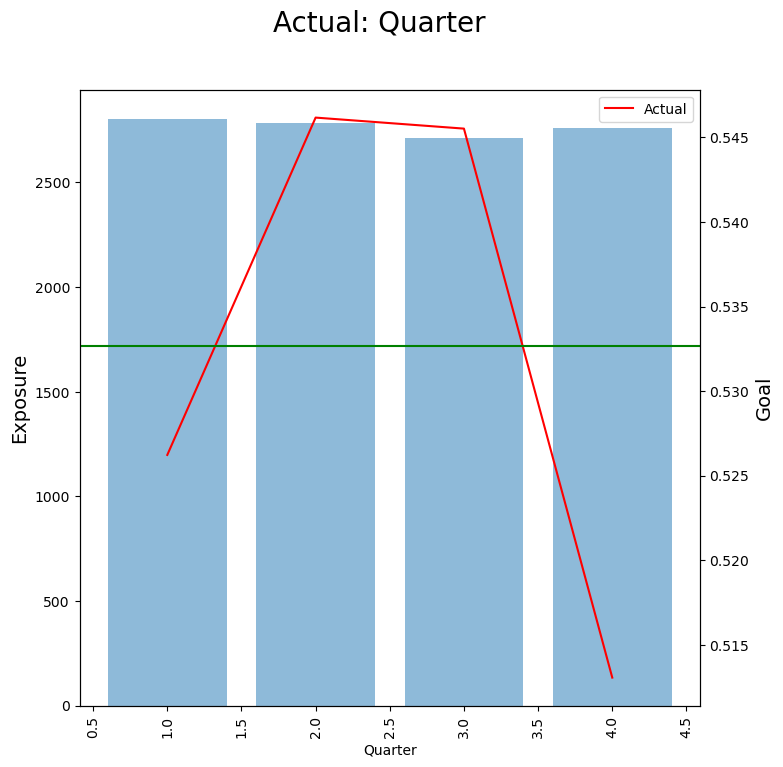

In [16]:
plot_feature(df_set_shots, "Goal", "Quarter")

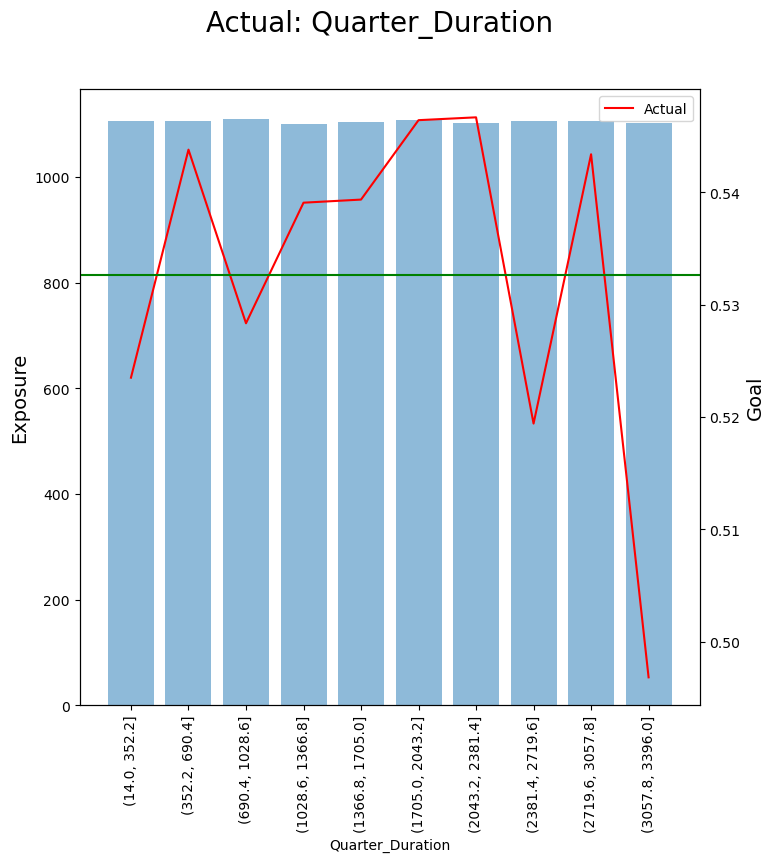

In [50]:
plot_feature(df_set_shots, "Goal", "Quarter_Duration")

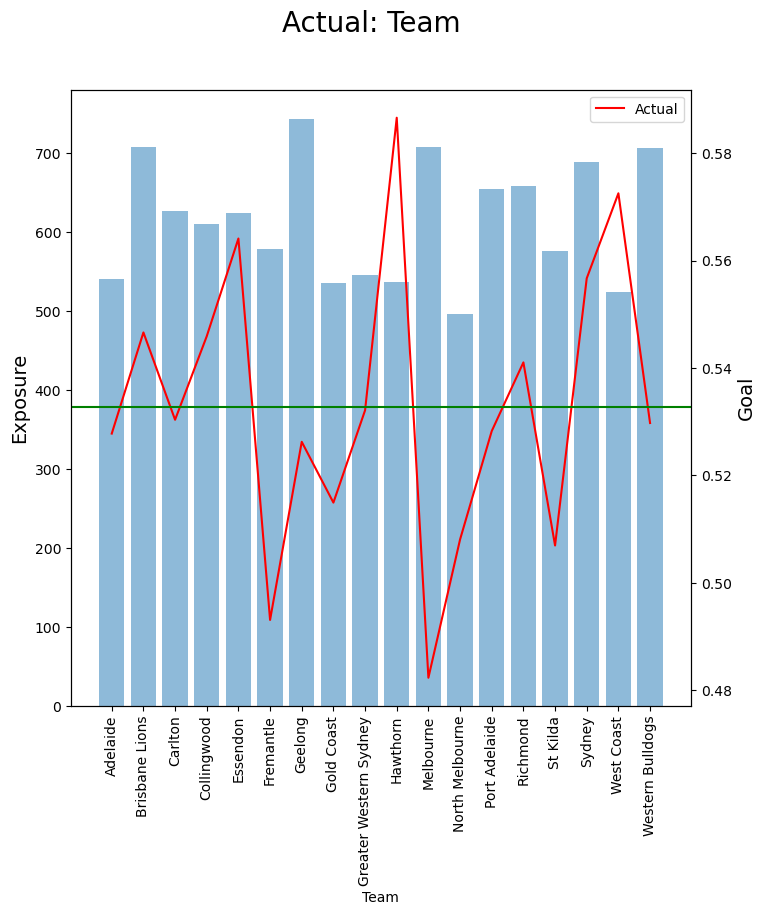

In [51]:
plot_feature(df_set_shots, "Goal", "Team")

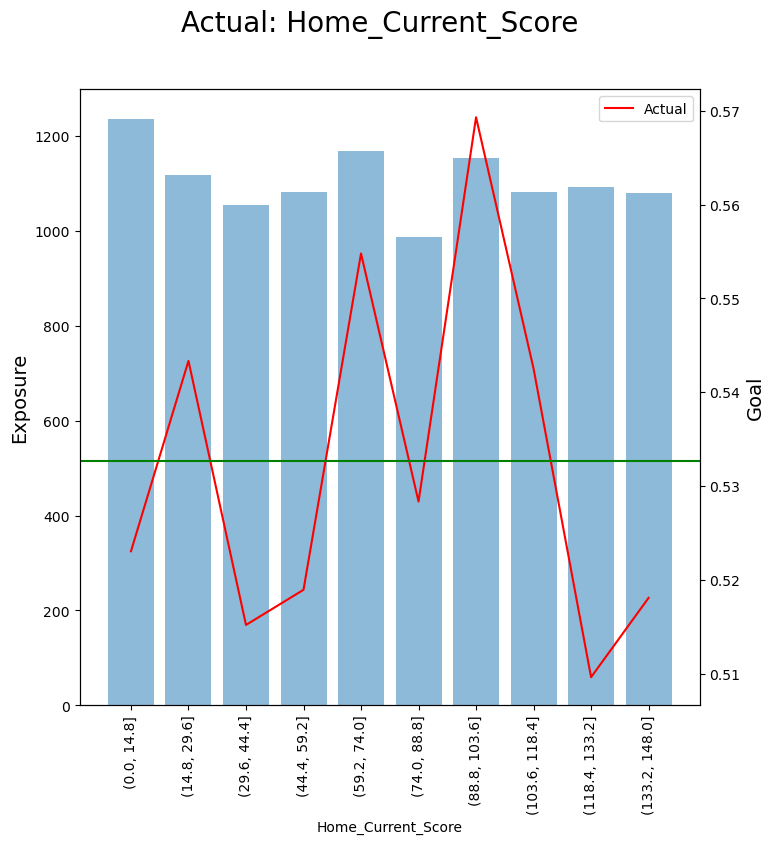

In [52]:
plot_feature(df_set_shots, "Goal", "Home_Current_Score")

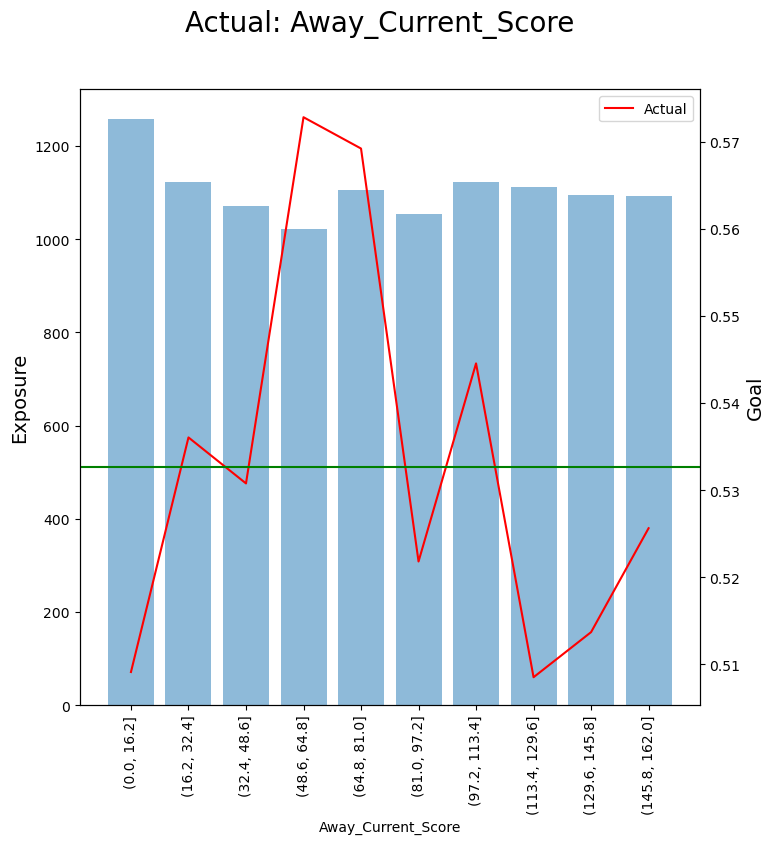

In [53]:
plot_feature(df_set_shots, "Goal", "Away_Current_Score")

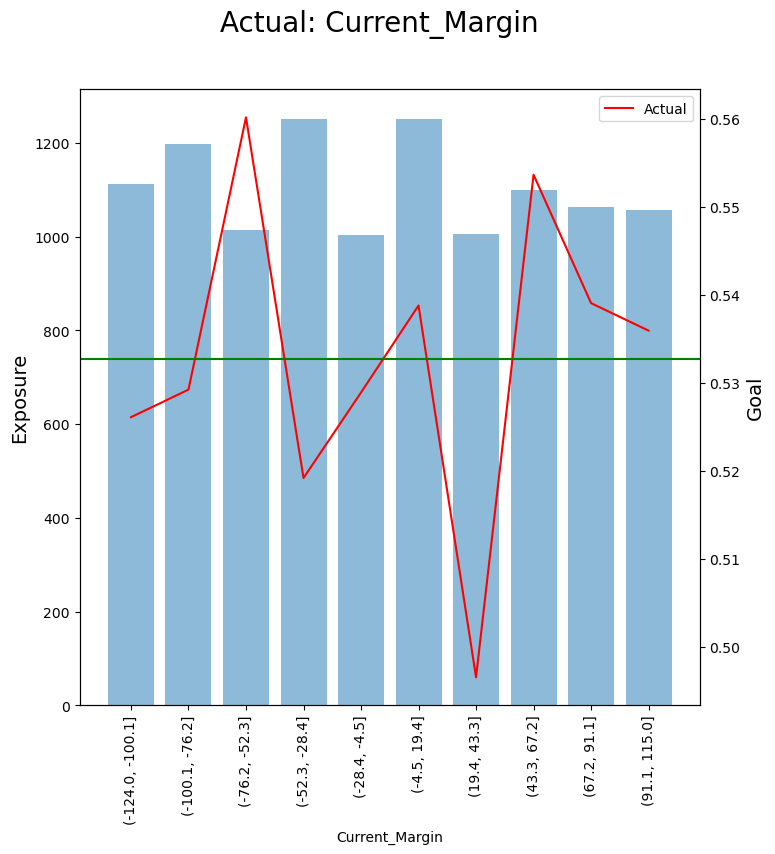

In [54]:
plot_feature(df_set_shots, "Goal", "Current_Margin")

In [34]:
df_set_shots.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
0,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True
1,28,possGain,behind,295.0,1,859,911.0,Sydney,Sydney,Sam Reid,Sam_Reid,Kick,52.0,35.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,1,0,1,18.0,7.0,11.0,Kick,Contested Mark,Contest Target,Kick Inside 50 Result,52.0,57.0,57.0,57.0,35.0,28.0,28.0,28.0,911.0,883.0,881.0,879.0,52.0,28.0,8.602325,26.0,35.0,43.600459,0.931882,53.392925,0.088007,5.042426,0.275978,15.812373,676.0,3.258097,True
2,34,possGain,behind,354.0,1,1015,1080.0,Sydney,Sydney,Josh P. Kennedy,Josh_P._Kennedy,Kick,45.0,16.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,1,0,1,18.0,8.0,10.0,Kick,Uncontested Mark,Kick,Handball Received,45.0,48.0,34.0,34.0,16.0,13.0,1.0,-2.0,1080.0,1046.0,1045.0,1045.0,65.0,34.0,4.242641,33.0,16.0,36.674242,0.451453,25.866357,0.158231,9.065951,0.505731,28.976251,1089.0,3.496508,True
3,53,throwIn,behind,537.0,1,1561,1638.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,59.0,27.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,1,0,1,20.0,15.0,5.0,Kick,Contested Mark,Kick Inside 50 Result,Kick Into F50,59.0,62.0,62.0,11.0,27.0,22.0,22.0,20.0,1638.0,1602.0,1600.0,1600.0,77.0,36.0,5.830952,19.0,27.0,33.015148,0.957589,54.865807,0.112618,6.452514,0.365590,20.946745,361.0,2.944439,True
4,59,centreBounce,goal,578.0,2,0,43.0,Sydney,Sydney,Callum Mills,Callum_Mills,Kick,33.0,12.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,6,0,6,20.0,16.0,4.0,Kick,Uncontested Mark,Kick Inside 50 Result,Kick Into F50,33.0,40.0,40.0,9.0,12.0,11.0,11.0,-8.0,43.0,21.0,20.0,20.0,43.0,22.0,7.071068,45.0,12.0,46.572524,0.260602,14.931417,0.133410,7.643825,0.416017,23.835998,2025.0,3.806662,True


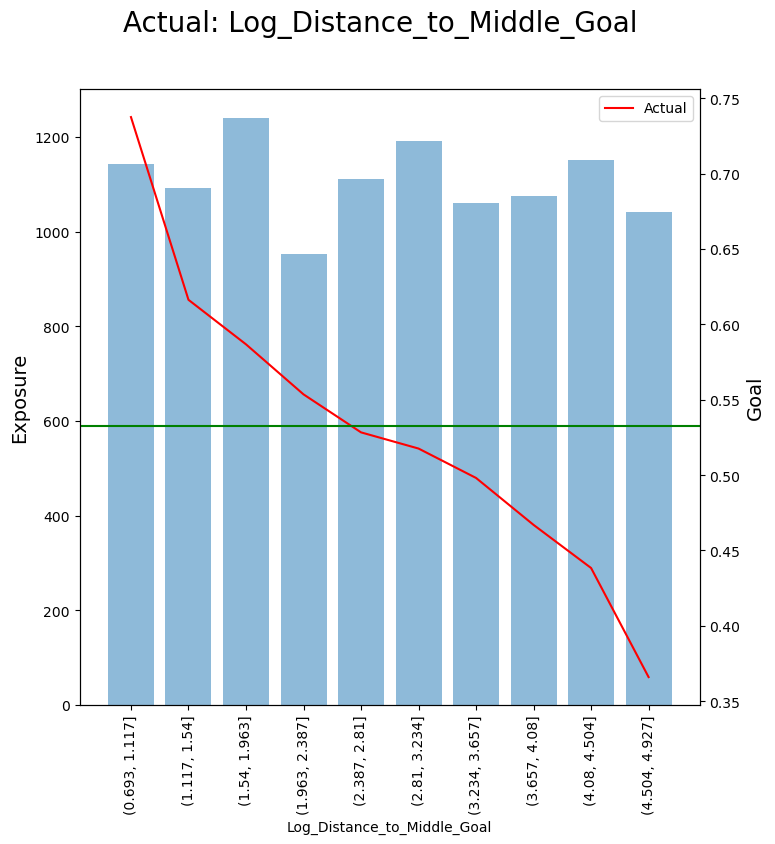

In [64]:
plot_feature(df_set_shots, "Goal", "Log_Distance_to_Middle_Goal")

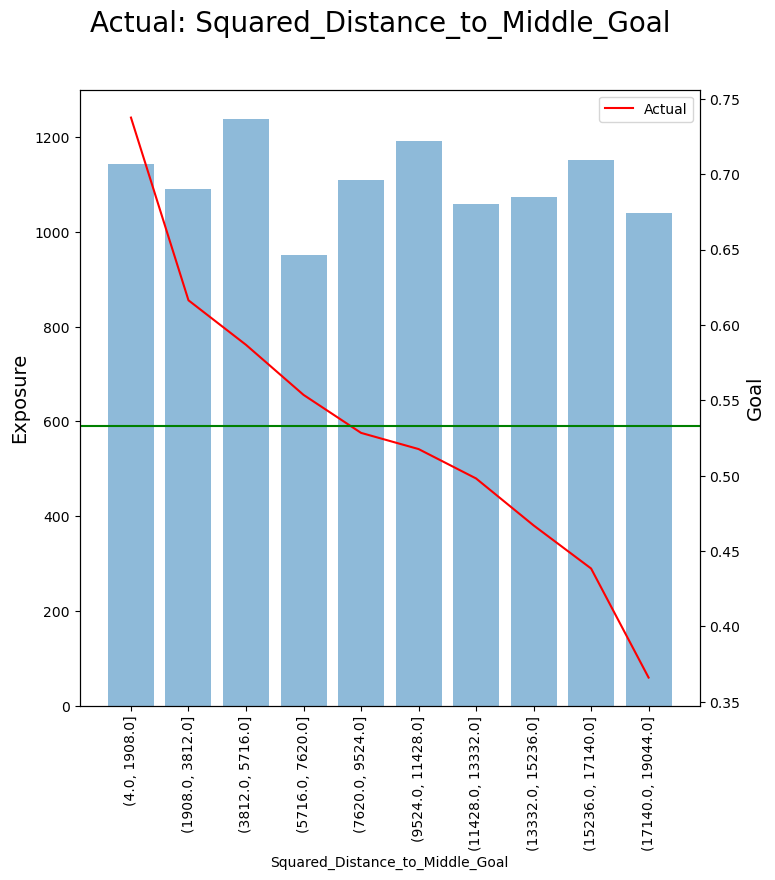

In [63]:
plot_feature(df_set_shots, "Goal", "Squared_Distance_to_Middle_Goal")

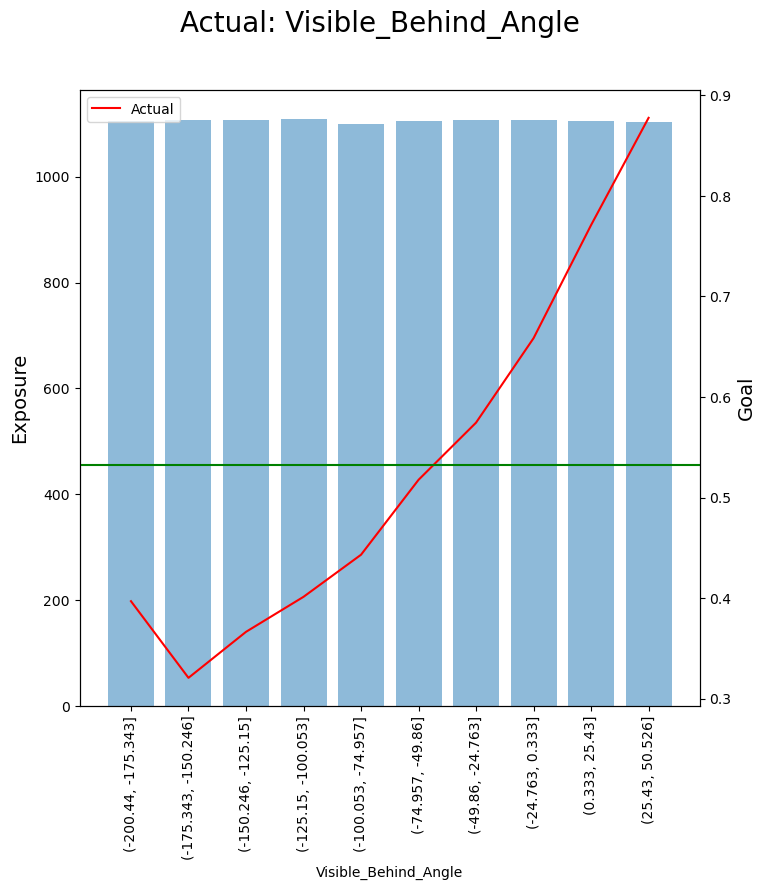

In [62]:
plot_feature(df_set_shots, "Goal", "Visible_Behind_Angle")

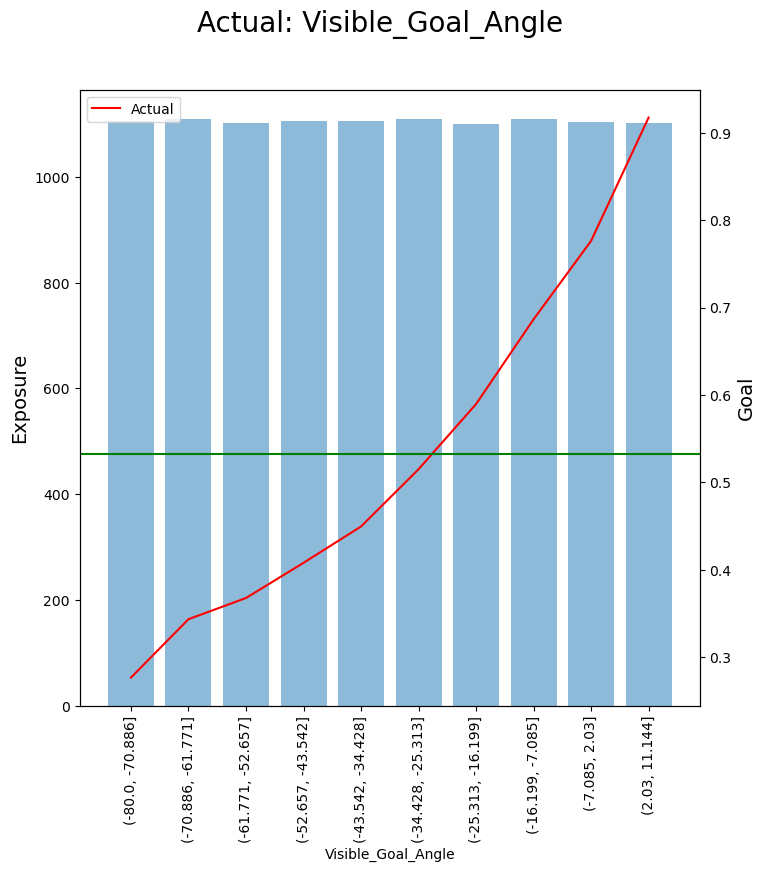

In [61]:
plot_feature(df_set_shots, "Goal", "Visible_Goal_Angle")

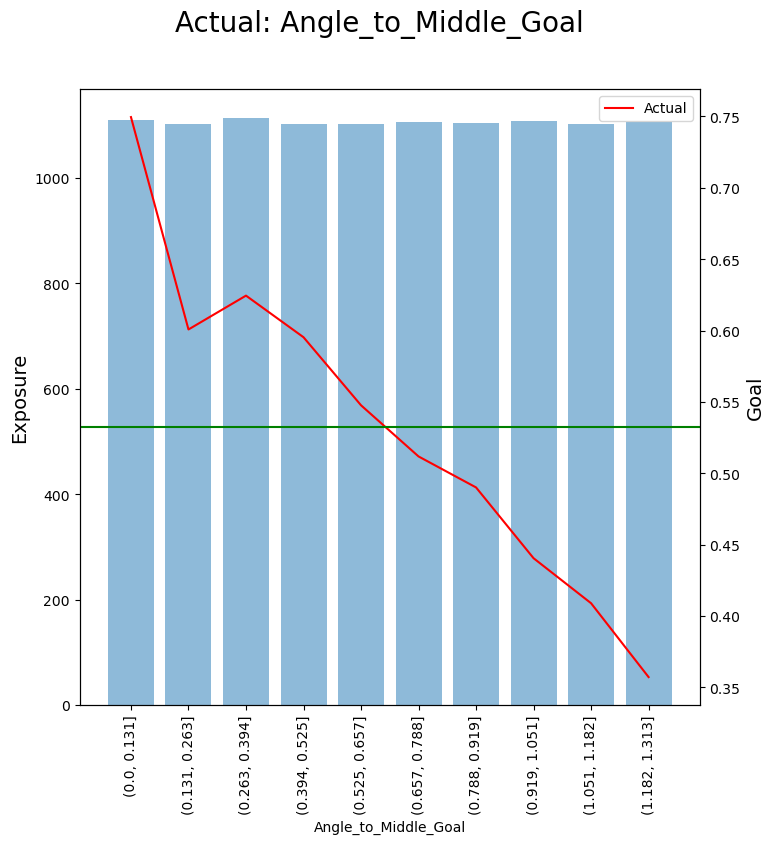

In [60]:
plot_feature(df_set_shots, "Goal", "Angle_to_Middle_Goal")

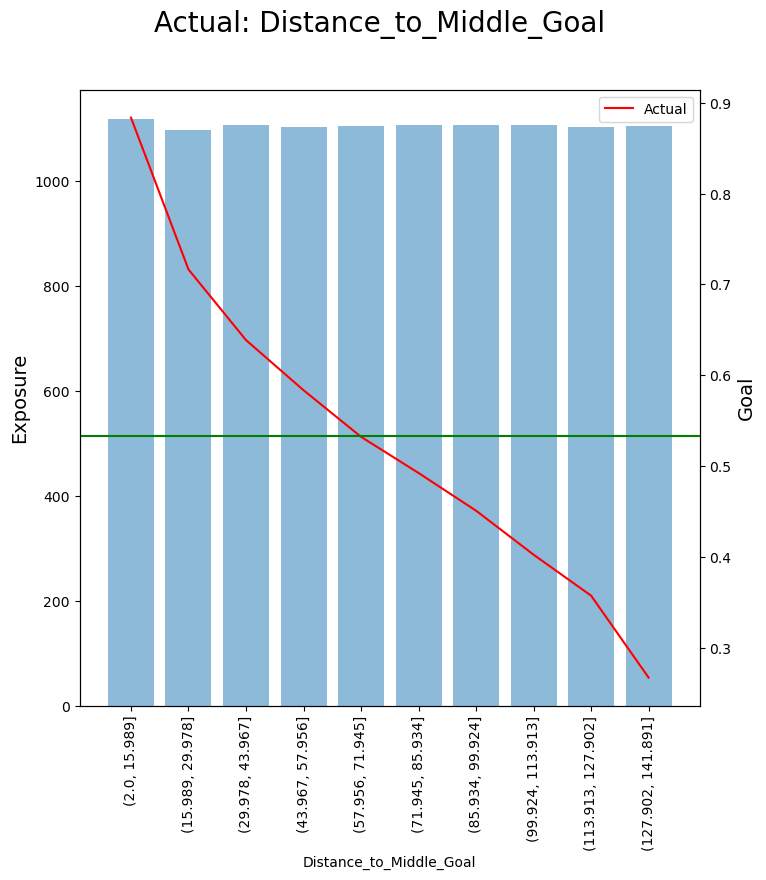

In [59]:
plot_feature(df_set_shots, "Goal", "Distance_to_Middle_Goal")

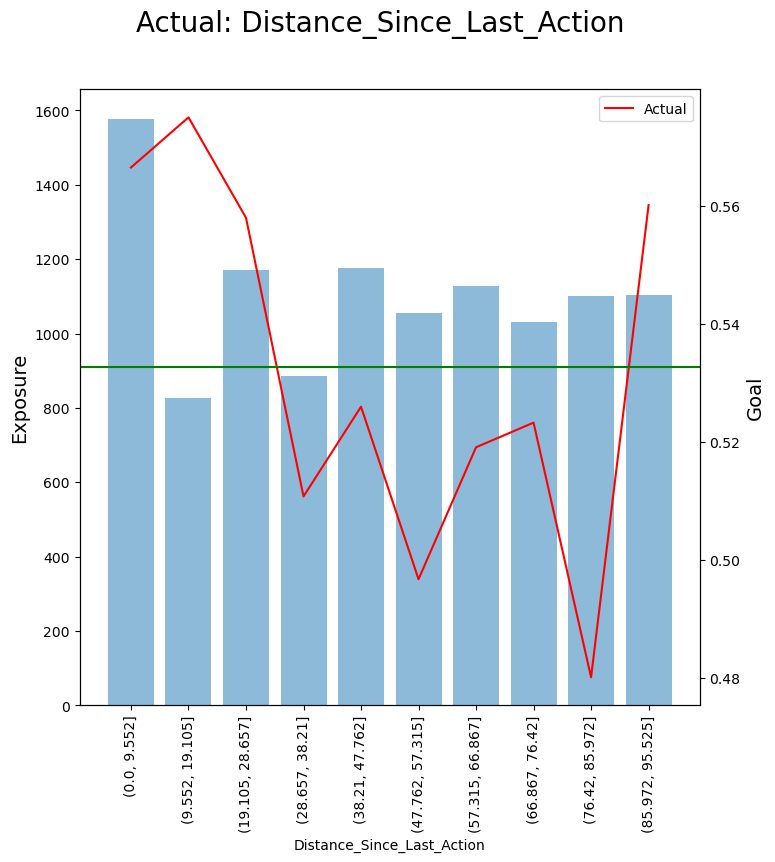

In [58]:
plot_feature(df_set_shots, "Goal", "Distance_Since_Last_Action")

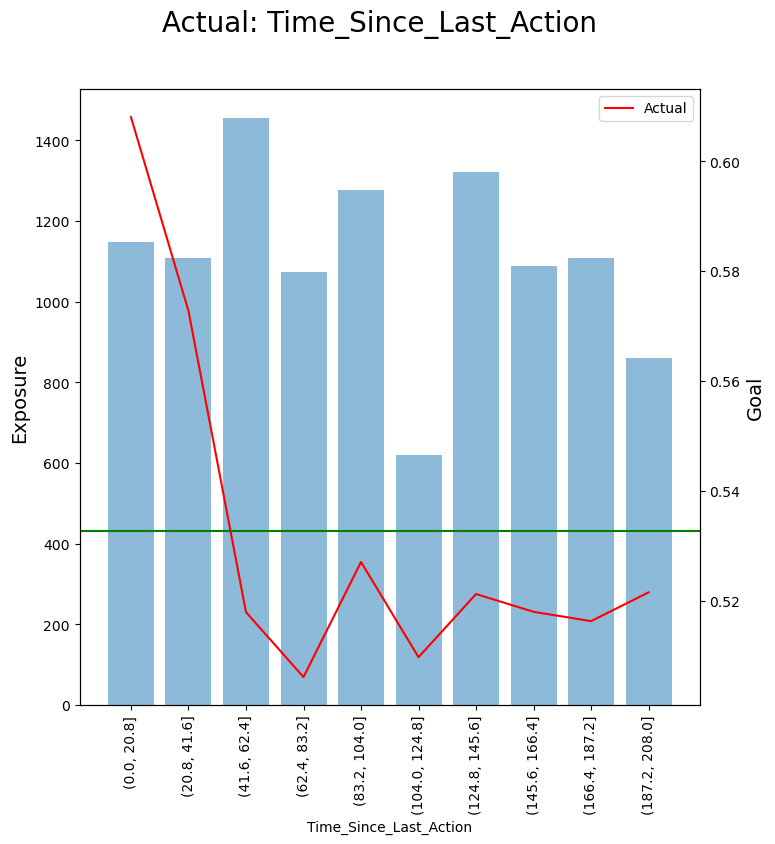

In [55]:
plot_feature(df_set_shots, "Goal", "Time_Since_Last_Action")

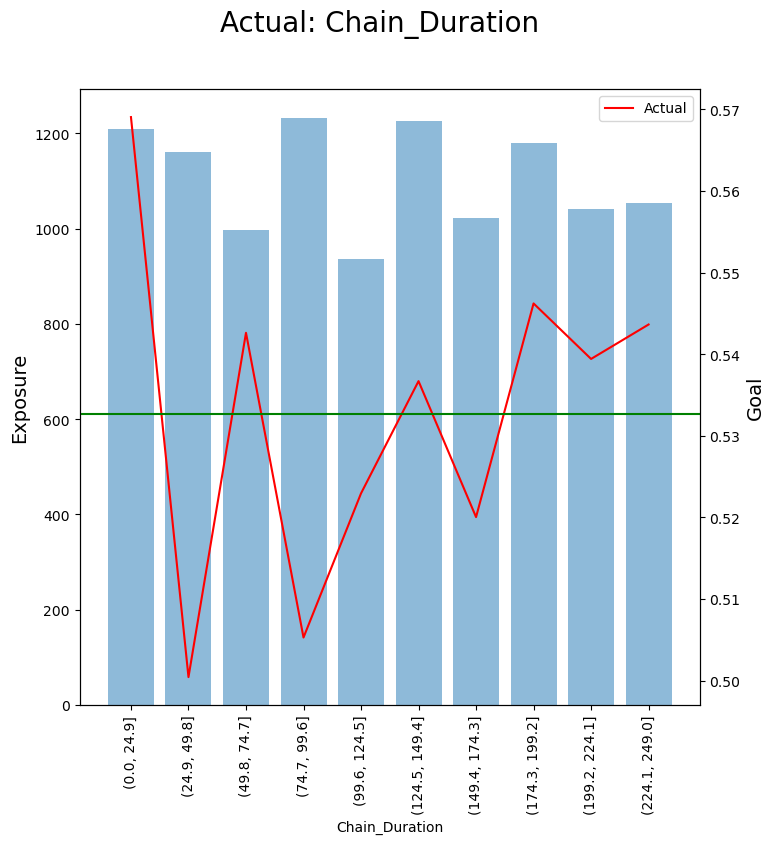

In [56]:
plot_feature(df_set_shots, "Goal", "Chain_Duration")

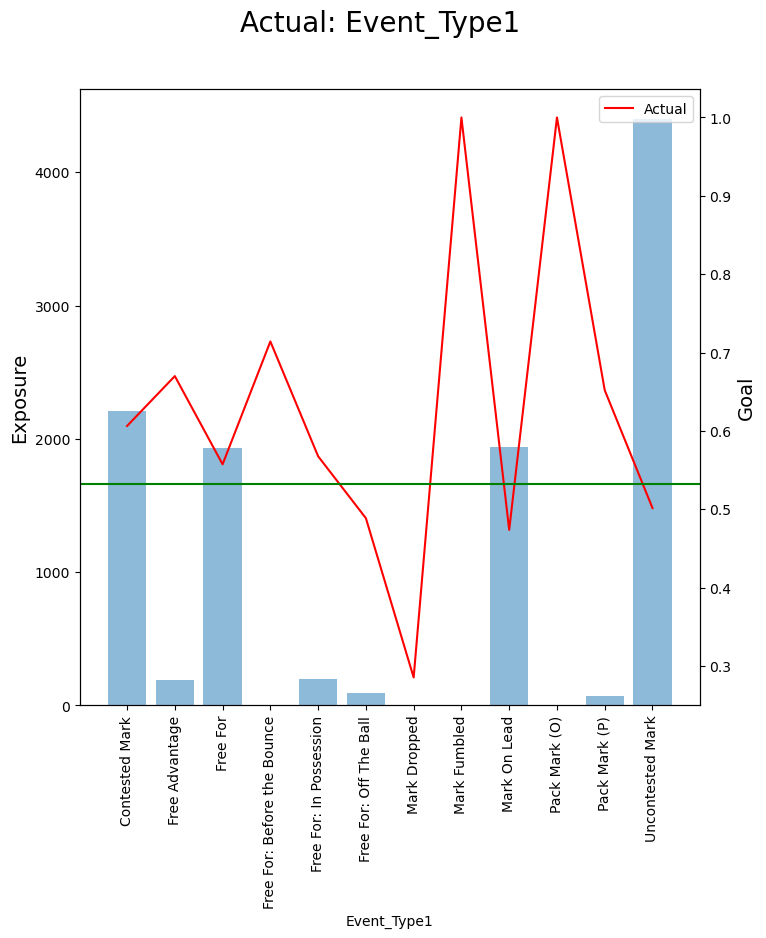

In [57]:
plot_feature(df_set_shots, "Goal", "Event_Type1")

Plot Two Way Averages

In [27]:
def _get_two_way_feature_plot_data(data, response, xaxis_feature, yaxis_feature):
    
    from pandas.api.types import is_numeric_dtype
    
    plot_dict = {
    'actual':data[response],
    'xaxis_feature':data[xaxis_feature],
    'yaxis_feature':data[yaxis_feature]
    }
    plot_data = pd.DataFrame(plot_dict)
    
    if is_numeric_dtype(plot_data['xaxis_feature']) & (len(np.unique(plot_data['xaxis_feature'])) > 50):
            bins = 10
            edges = np.linspace(plot_data['xaxis_feature'].min(), plot_data['xaxis_feature'].max(), bins+1).astype(float)
            labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
            plot_data['xaxis_feature'] = pd.cut(plot_data['xaxis_feature'], bins = bins, labels = labels)
            
    if is_numeric_dtype(plot_data['yaxis_feature']) & (len(np.unique(plot_data['yaxis_feature'])) > 50):
            bins = 10
            edges = np.linspace(plot_data['yaxis_feature'].min(), plot_data['yaxis_feature'].max(), bins+1).astype(float)
            labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
            plot_data['yaxis_feature'] = pd.cut(plot_data['yaxis_feature'], bins = bins, labels = labels)
            
    feature_plot_data = plot_data.groupby(['xaxis_feature', 'yaxis_feature']).agg(
            actual = ('actual', 'mean'),
            exposure = ('actual', 'size'),
            ).reset_index()
    
    return feature_plot_data.sort_values(by='xaxis_feature')

In [28]:
def plot_two_way_feature(data, response, xaxis_feature, yaxis_feature):
    
    import plotly
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    feature_plot_data = _get_two_way_feature_plot_data(data, response, xaxis_feature, yaxis_feature)
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    plotly_default_colours = plotly.colors.qualitative.Plotly
    unique_levels = list(feature_plot_data['yaxis_feature'].unique())

    for index in range(len(unique_levels)):
        level_data = feature_plot_data[feature_plot_data['yaxis_feature'] == unique_levels[index]]
        # Add traces
        fig.add_trace(
            go.Bar(x=level_data['xaxis_feature'], y=level_data['exposure'], 
                name=str(unique_levels[index]),
                opacity = 0.5,
                marker_color = plotly_default_colours[index]),
            secondary_y=False,
        )
    for index in range(len(unique_levels)):
        level_data = feature_plot_data[feature_plot_data['yaxis_feature'] == unique_levels[index]]
        fig.add_trace(
            go.Scatter(x=level_data['xaxis_feature'], y=level_data['actual'], 
                    name=str(unique_levels[index]),
                    marker_color = plotly_default_colours[index]),
            secondary_y=True,
        )

    # Add figure title
    fig.update_layout(
        title_text="Two Way AvE: " + xaxis_feature + " x " + yaxis_feature,
        width = 1000,
        height = 600,
        barmode = "group"
    )

    # Set x-axis title
    fig.update_xaxes(title_text=xaxis_feature)

    # Set y-axes titles
    fig.update_yaxes(title_text="Exposure", secondary_y=False)
    fig.update_yaxes(title_text=response, secondary_y=True)

    fig.show()

In [31]:
plot_two_way_feature(df_set_shots, "Goal", "x", "Year")